# 1. Plot temporal trends of user participation

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_genderlabel_added = pd.read_csv('./full_data+genderlabel_added.csv', encoding='utf-8-sig')

In [3]:
# df_classed = df_genderlabel_added[df_genderlabel_added['gender_label']==0]
# df_classed = df_genderlabel_added[df_genderlabel_added['gender_label']==1]
# df_classed = df_genderlabel_added[df_genderlabel_added['gender_label']==2]
# df_classed = df_genderlabel_added[df_genderlabel_added['gender_label'].isna()]
df_classed = df_genderlabel_added
df_summed = df_genderlabel_added

**Note**: _Na_ posts' uids are **included** in the _df_summed_ and in calculating the continuing posters

In [4]:
df_per_days_classed = [None] * 31
for i in range(10, 31):
    df_per_days_classed[i] = df_classed.loc[df_classed['time'].str.contains("2022/06/"+str(i), case=False)]
    
df_per_days_summed = [None] * 31
for i in range(10, 31):
    df_per_days_summed[i] = df_summed.loc[df_summed['time'].str.contains("2022/06/"+str(i), case=False)]

In [5]:
# find how many posts each day
ls_c_mid = [None] * 21
for i in range(0, 21):
    ls_c_mid[i] = df_per_days_classed[i+10].nunique()['_id']
    
# ls_c_mid

In [6]:
# find how many unique users each day
ls_c_uid_classed = [None] * 21
for i in range(0, 21):
    ls_c_uid_classed[i] = df_per_days_classed[i+10].nunique()['uid']

# ls_c_uid_classed

In [114]:
# find how many continued users each day
ls_uids_per_day_classed = [None] * 21 # each is a list of uids in that day
for i in range(0, 21):
    ls_uids_per_day_classed[i] = [*set(df_per_days_classed[i+10]['uid'].tolist())]

ls_uids_per_day_summed = [None] * 21 # each is a list of uids in that day
for i in range(0, 21):
    ls_uids_per_day_summed[i] = [*set(df_per_days_summed[i+10]['uid'].tolist())]


ls_uid_checked = set(ls_uids_per_day_summed[0]) # initialize
ls_c_continued_uids = [0] * 21

for i in range(1, 21):
    ls_c_continued_uids[i] = len(set(ls_uid_checked).intersection(ls_uids_per_day_classed[i]))
    # when end a loop, update checked_uid list
    ls_uid_checked.update(ls_uids_per_day_summed[i])
    
ls_c_new_uids = np.subtract(np.array(ls_c_uid_classed), np.array(ls_c_continued_uids)).tolist()

In [115]:
df_vis = pd.DataFrame(data=
                      {
#                           'Total posters (Gender-related)':ls_c_uid_classed, 
                       'New posters':ls_c_new_uids, 
                       'Continuing posters':ls_c_continued_uids})

In [7]:
import statistics as stat
import pymannkendall as mk

In [64]:
# calculate the mean proportion of new users each day
# stat.mean(df_vis['New posters'][1:]/ls_c_uid_classed[1:])*100 # 64.50324511775855 total
# stat.mean(df_vis['New posters'][1:]/ls_c_uid_classed[1:])*100 # 48.39135704663349 crime
# stat.mean(df_vis['New posters'][1:]/ls_c_uid_classed[1:])*100

48.39135704663349

In [121]:
# ls_con_crime = 100*df_vis['Continuing posters'][1:]/ls_c_uid_classed[1:]
# ls_con_crime
# ls_con_gender = 100*df_vis['Continuing posters'][1:]/ls_c_uid_classed[1:]
# ls_con_gender
# ls_con_other = 100*df_vis['Continuing posters'][1:]/ls_c_uid_classed[1:]
# ls_con_other

ls_con_total = 100*df_vis['New posters']/ls_c_uid_classed
print(stat.mean(ls_con_total))
print(stat.stdev(ls_con_total))

64.50324511775855
15.498253970252508


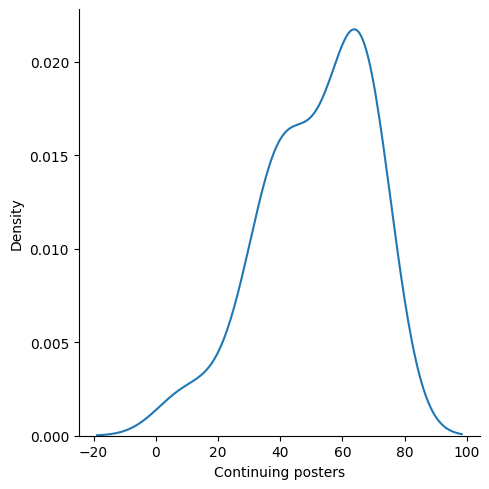

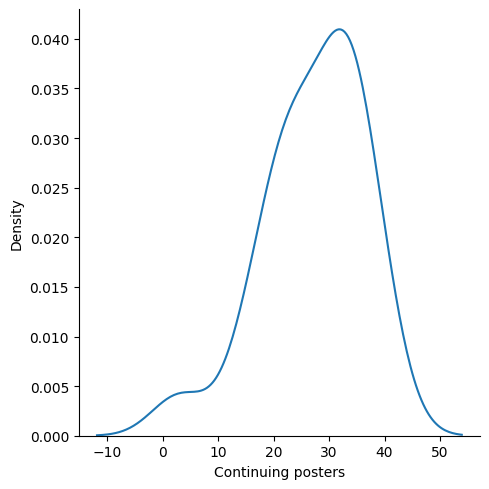

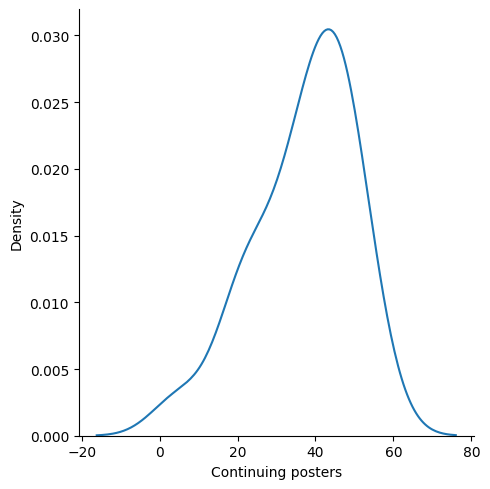

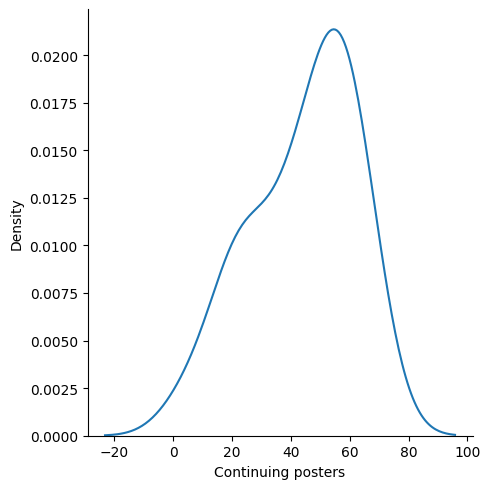

In [106]:
sns.displot(ls_con_crime, kind='kde')
sns.displot(ls_con_gender, kind='kde')
sns.displot(ls_con_other, kind='kde')
sns.displot(ls_con_na, kind='kde')

In [ ]:
from scipy.stats import mannwhitneyu

In [118]:
print('Crime')
print(stat.mean(ls_con_crime))
print(stat.stdev(ls_con_crime))

print('Gender')
print(stat.mean(ls_con_gender))
print(stat.stdev(ls_con_gender))

print('Other')
print(stat.mean(ls_con_other))
print(stat.stdev(ls_con_other))

print('Na')
print(stat.mean(ls_con_na))
print(stat.stdev(ls_con_na))

print('----------------------')
U1, p = mannwhitneyu(ls_con_crime, ls_con_na)

nx, ny = len(ls_con_crime), len(ls_con_na)
U2 = nx*ny - U1

print(U1)
print(U2)
print(p)

Crime
51.60864295336651
16.99470631365457
Gender
27.26531260919074
9.002880093160627
Other
36.94397982649079
12.790791119218271
Na
44.02854434809227
17.57100229972132
----------------------
257.0
143.0
0.12643061736676814


Mann_Kendall_Test(trend='increasing', h=True, p=2.1357854571801838e-05, z=4.250201233625979, Tau=0.6947368421052632, s=132.0, var_s=950.0, slope=0.017809844704602628, intercept=0.22185895060126778)


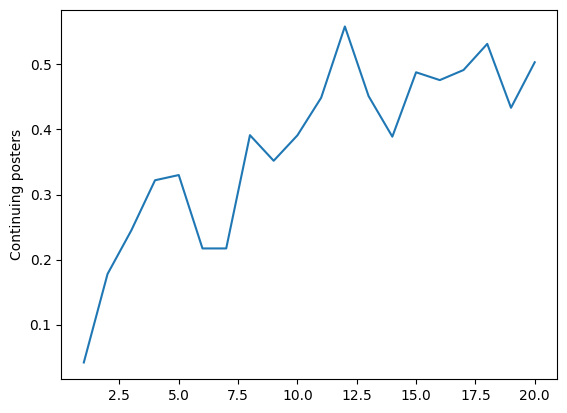

In [116]:
ls_conti = df_vis['Continuing posters'][1:]/ls_c_uid_classed[1:]

sns.lineplot(x=list(range(1, 21)), y=ls_conti)

res = mk.original_test(ls_conti, alpha=0.01)
print(res)

In [11]:
ls_count = df_vis['New posters'].tolist()
ls_count.extend(df_vis['Continuing posters'].tolist())
ls_type = ['New posters']*21
ls_type.extend(['Continuing posters']*21)


df_wide = pd.DataFrame(data={
#     'index':list(range(0,42)),
    'Day since report':list(range(1,22))*2,
    'Number of unique posters':ls_count,
    'Poster type':ls_type
})

# df_wide

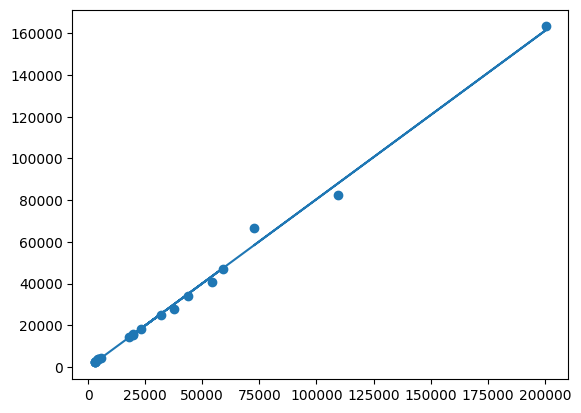

r_squared =  0.9959751955114168
p =  3.1821392785769122e-24


In [10]:
# linear correlation between post volume and unique users
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(ls_c_mid, ls_c_uid_classed)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, ls_c_mid))

plt.scatter(ls_c_mid, ls_c_uid_classed)
plt.plot(ls_c_mid, mymodel)
plt.show()

print('r_squared = ', r*r)
print('p = ', p)

In [20]:
import seaborn.objects as so
import seaborn as sns

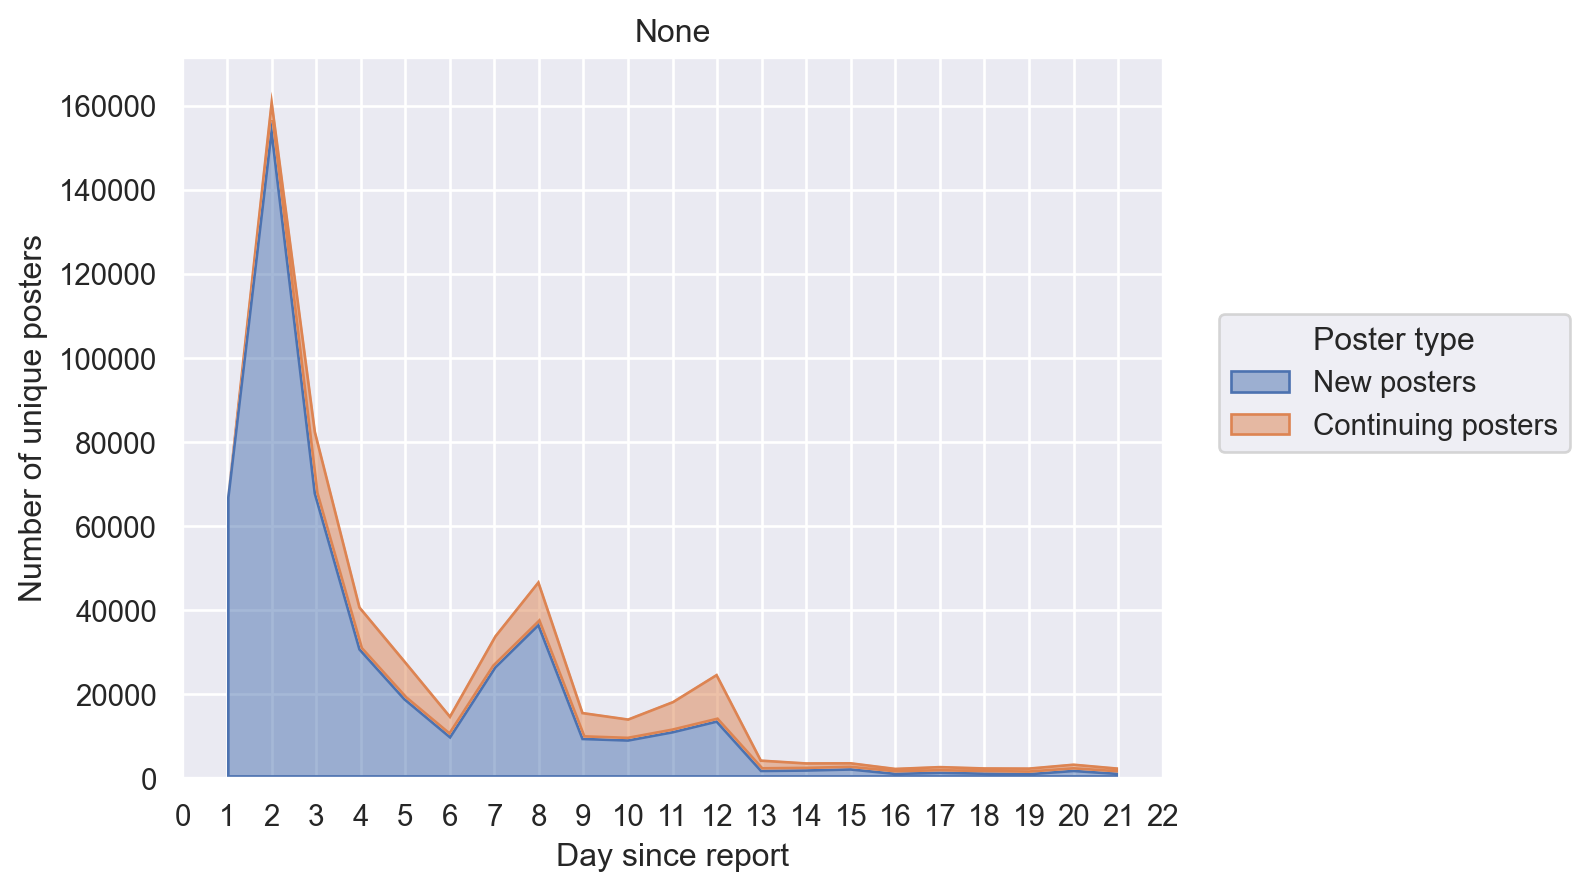

In [39]:
user_palette = {
    'New posters':'#f1a340',
    'Continuing posters':'#998ec3'
}
p = so.Plot(df_wide, 'Day since report', 'Number of unique posters', color='Poster type').scale(
        x=so.Continuous().tick(every=1),
    ).label(
        title="None"
    )
p.add(so.Area(alpha=.5), so.Stack())

# 2. Calculate ratios of cross-category posting

In [122]:
set_crime_uids = set(df_genderlabel_added.loc[df_genderlabel_added['gender_label']==0]['uid'])
set_gender_uids = set(df_genderlabel_added.loc[df_genderlabel_added['gender_label']==1]['uid'])
set_other_uids = set(df_genderlabel_added.loc[df_genderlabel_added['gender_label']==2]['uid'])
set_na_uids = set(df_genderlabel_added.loc[df_genderlabel_added['gender_label'].isna()]['uid'])
set_total_uids = set(df_genderlabel_added['uid'])

In [123]:
print("Crime unique uid count:\t", len(set_crime_uids))
print("Gender unique uid count:", len(set_gender_uids))
print("Other unique uid count:\t", len(set_other_uids))
print("Na unique uid count:\t", len(set_na_uids))
print("Sum of above (with duplicates):\t", 67671+96342+309202+55881)

Crime unique uid count:	 67671
Gender unique uid count: 96342
Other unique uid count:	 309202
Na unique uid count:	 55881
Sum of above (with duplicates):	 529096


In [124]:
print("Total unique uid count:\t", len(set_total_uids)) # correct to be less than 529096

Total unique uid count:	 472235


In [370]:
data = {
    'Crime': [len(set_crime_uids.intersection(set_crime_uids)), len(set_crime_uids.intersection(set_gender_uids)), len(set_crime_uids.intersection(set_other_uids)), len(set_crime_uids.intersection(set_na_uids)), len(set_crime_uids.intersection(set_total_uids))],
    'Gender': [len(set_gender_uids.intersection(set_crime_uids)), len(set_gender_uids.intersection(set_gender_uids)), len(set_gender_uids.intersection(set_other_uids)), len(set_gender_uids.intersection(set_na_uids)), len(set_gender_uids.intersection(set_total_uids))],
    'Other': [len(set_other_uids.intersection(set_crime_uids)), len(set_other_uids.intersection(set_gender_uids)), len(set_other_uids.intersection(set_other_uids)), len(set_other_uids.intersection(set_na_uids)), len(set_other_uids.intersection(set_total_uids))],
    'None': [len(set_na_uids.intersection(set_crime_uids)), len(set_na_uids.intersection(set_gender_uids)), len(set_na_uids.intersection(set_other_uids)), len(set_na_uids.intersection(set_na_uids)), len(set_na_uids.intersection(set_total_uids))],
#     'Total': [len(set_total_uids.intersection(set_crime_uids)), len(set_total_uids.intersection(set_gender_uids)), len(set_total_uids.intersection(set_other_uids)), len(set_total_uids.intersection(set_na_uids)), len(set_total_uids.intersection(set_total_uids))]
}

In [371]:
pd.DataFrame(data=data, index=['Crime', 'Gender', 'Other', 'None', 'Total'])

,Crime,Gender,Other,None
Crime,67671,4895,20211,3762
Gender,4895,96342,16467,3178
Other,20211,16467,309202,16457
None,3762,3178,16457,55881
Total,67671,96342,309202,55881


In [368]:
data = {
    'Crime': [len(set_crime_uids.intersection(set_crime_uids))/len(set_crime_uids), 
              len(set_crime_uids.intersection(set_gender_uids))/len(set_gender_uids), 
              len(set_crime_uids.intersection(set_other_uids))/len(set_other_uids), 
              len(set_crime_uids.intersection(set_na_uids))/len(set_na_uids), 
              len(set_crime_uids.intersection(set_total_uids))/len(set_total_uids)],
    
    'Gender': [len(set_gender_uids.intersection(set_crime_uids))/len(set_crime_uids), 
               len(set_gender_uids.intersection(set_gender_uids))/len(set_gender_uids), 
               len(set_gender_uids.intersection(set_other_uids))/len(set_other_uids), 
               len(set_gender_uids.intersection(set_na_uids))/len(set_na_uids), 
               len(set_gender_uids.intersection(set_total_uids))/len(set_total_uids)],
    
    'Other': [len(set_other_uids.intersection(set_crime_uids))/len(set_crime_uids), 
              len(set_other_uids.intersection(set_gender_uids))/len(set_gender_uids), 
              len(set_other_uids.intersection(set_other_uids))/len(set_other_uids), 
              len(set_other_uids.intersection(set_na_uids))/len(set_na_uids), 
              len(set_other_uids.intersection(set_total_uids))/len(set_total_uids)],
    
    'None': [len(set_na_uids.intersection(set_crime_uids))/len(set_crime_uids), 
             len(set_na_uids.intersection(set_gender_uids))/len(set_gender_uids), 
             len(set_na_uids.intersection(set_other_uids))/len(set_other_uids), 
             len(set_na_uids.intersection(set_na_uids))/len(set_na_uids), 
             len(set_na_uids.intersection(set_total_uids))/len(set_total_uids)]
    
#     'Total': [len(set_total_uids.intersection(set_crime_uids))/len(set_crime_uids), 
#               len(set_total_uids.intersection(set_gender_uids))/len(set_gender_uids), 
#               len(set_total_uids.intersection(set_other_uids))/len(set_other_uids), 
#               len(set_total_uids.intersection(set_na_uids))/len(set_na_uids), 
#               len(set_total_uids.intersection(set_total_uids))/len(set_total_uids)]
}

In [369]:
df_cross_ratios = pd.DataFrame(data=data, index=['Crime', 'Gender', 'Other', 'None', 'Total'])
pd.options.display.float_format = '{:.2%}'.format
df_cross_ratios

,Crime,Gender,Other,None
Crime,100.00%,7.23%,29.87%,5.56%
Gender,5.08%,100.00%,17.09%,3.30%
Other,6.54%,5.33%,100.00%,5.32%
None,6.73%,5.69%,29.45%,100.00%
Total,14.33%,20.40%,65.48%,11.83%


Note: i.e., the way to describe cell {index=Crime, column=Gender} is...
7.23% of Crime-related content posters also posted Gender-related content
conversely,
5.08% of Gender-related content posters also posted Crime-related content

In [127]:
# find proportion of users posted at least two categories

s_cg = set_crime_uids.intersection(set_gender_uids)
s_co = set_crime_uids.intersection(set_other_uids)
s_cn = set_crime_uids.intersection(set_na_uids)

s_go = set_gender_uids.intersection(set_other_uids)
s_gn = set_gender_uids.intersection(set_na_uids)

s_on = set_other_uids.intersection(set_na_uids)

s_atLeast_2 = s_cg.union(s_co).union(s_cn).union(s_go).union(s_gn).union(s_on)

len(s_atLeast_2)

49383

In [128]:
print(len(s_cg))
print(len(s_co))
print(len(s_cn))

print(len(s_go))
print(len(s_gn))

print(len(s_on))

4895
20211
3762
16467
3178
16457


In [132]:
100*len(s_atLeast_2)/len(set_total_uids)

10.457293508528593

# See dis of ls_c_mid

In [20]:
print('mean: ', stat.mean(ls_c_mid))
print('stdev: ', stat.stdev(ls_c_mid))
print('variance: ', stat.variance(ls_c_mid))

mean:  34494
stdev:  47468.73373074112
variance:  2253280682
